# Examples of Linear Regression with Polynomial Models

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from datasets.polynomials import Polynomial
from models.linear_regression import LinearRegression
import time

## Approximating a Noisy Quadratic Function with Second-order Polynomial

In [2]:
quadratic = Polynomial()
train_x, train_y = quadratic.generate(400)
test_x, test_y = quadratic.generate(100)

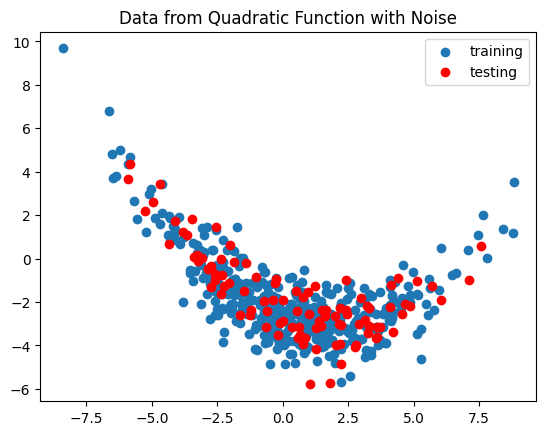

In [3]:
plt.scatter(train_x, train_y, label="training")
plt.scatter(test_x, test_y, label="testing", color="r")
plt.title("Data from Quadratic Function with Noise")
plt.legend()

avg training loss: 0.47873092427366765
avg testing loss: 0.4439720368691074
approximation: -2.7228 -0.4281x +0.1161x^2
actual function: -2.7717 - 0.4681x + 0.1218x^2


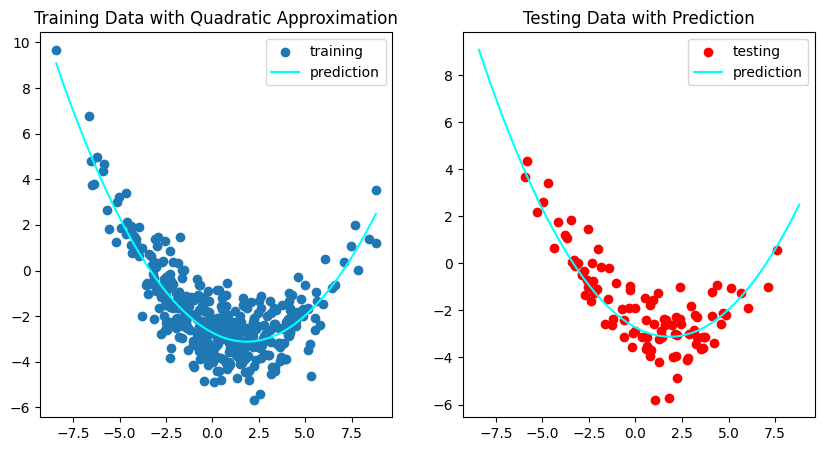

In [4]:
model = LinearRegression(order=2)
theta, train_loss = model.train(train_x, train_y)
_, test_loss = model.predict(test_x, theta, y=test_y)

print(f"avg training loss: {train_loss / len(train_x)}")
print(f"avg testing loss: {test_loss / len(test_x)}")
print(f"approximation: {model.to_string(theta)}")
print(f"actual function: {quadratic}")

plt_x = np.arange(min(min(train_x), min(test_x)), max(max(train_x), max(test_x)), 0.05)
plt_y = model.predict(plt_x, theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y, label="training")
ax[0].plot(plt_x, plt_y, c="cyan", label="prediction")
ax[0].set_title("Training Data with Quadratic Approximation")
ax[0].legend()

ax[1].scatter(test_x, test_y, c="r", label="testing")
ax[1].plot(plt_x, plt_y, c="cyan", label="prediction")
ax[1].set_title("Testing Data with Prediction")
ax[1].legend()


## Approximating Data with First- and Third-order Polynomials

linear approximation: -1.7765 -0.3146x
avg linear training loss: 1.4411134391488434
avg linear testing loss: 1.1714470378913
cubic approximation: -2.7287 -0.4145x +0.1171x^2 -0.0006x^3
avg cubic training loss: 0.47822699134648383
avg cubic testing loss: 0.4460875225167938


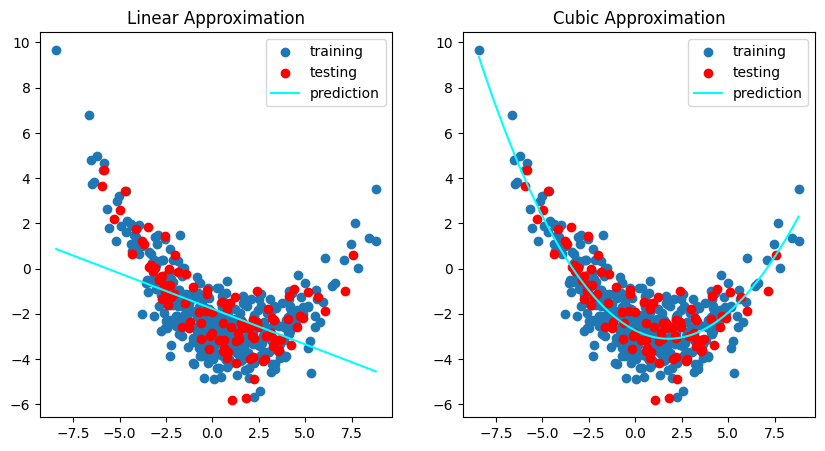

In [5]:
lin_model = LinearRegression(order=1)
lin_theta, lin_loss = lin_model.train(train_x, train_y)
_, lin_test_loss = lin_model.predict(test_x, lin_theta, y=test_y)

cub_model = LinearRegression(order=3)
cub_theta, cub_loss = cub_model.train(train_x, train_y)
_, cub_test_loss = cub_model.predict(test_x, cub_theta, y=test_y)

print(f"linear approximation: {lin_model.to_string(lin_theta)}")
print(f"avg linear training loss: {lin_loss / len(train_x)}")
print(f"avg linear testing loss: {lin_test_loss / len(test_x)}")
print(f"cubic approximation: {cub_model.to_string(cub_theta)}")
print(f"avg cubic training loss: {cub_loss / len(train_x)}")
print(f"avg cubic testing loss: {cub_test_loss / len(test_x)}")

lin_y = lin_model.predict(plt_x, lin_theta)
cub_y = cub_model.predict(plt_x, cub_theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y, label="training")
ax[0].scatter(test_x, test_y, c="r", label="testing")
ax[0].plot(plt_x, lin_y, c="cyan", label="prediction")
ax[0].set_title("Linear Approximation")
ax[0].legend()

ax[1].scatter(train_x, train_y, label="training")
ax[1].scatter(test_x, test_y, c="r", label="testing")
ax[1].plot(plt_x, cub_y, c="cyan", label="prediction")
ax[1].set_title("Cubic Approximation")
ax[1].legend()

## Regression with First-order higher-dimensional Polynomials

In [6]:
higher_dimensional = Polynomial(order=1, dim=100)
train_x, train_y = higher_dimensional.generate(4000)
test_x, test_y = higher_dimensional.generate(1000)

In [7]:
higher_model = LinearRegression(input_dim=100)
theta, train_loss = higher_model.train(train_x, train_y)
_, test_loss = higher_model.predict(test_x, theta, y=test_y)
print(f"avg training loss: {train_loss / len(train_x)}")
print(f"avg testing loss: {test_loss / len(test_x)}")

avg training loss: 0.4826779517281441
avg testing loss: 0.5209542305938386


## Regression with Second-order higher-dimensional Polynomials

In [10]:
higher_dimensional_2 = Polynomial(order=2, dim=20)
train_x, train_y = higher_dimensional_2.generate(4000)
test_x, test_y = higher_dimensional_2.generate(1000)

In [11]:
first_order = LinearRegression(input_dim=20)
fo_theta, fo_train_loss = first_order.train(train_x, train_y)
_, fo_test_loss = first_order.predict(test_x, fo_theta, y=test_y)
print(f"first-order avg training loss: {fo_train_loss / len(train_x)}")
print(f"first-order avg testing loss: {fo_test_loss / len(test_x)}")

second_order = LinearRegression(order=2, input_dim=20)
so_theta, so_train_loss = second_order.train(train_x, train_y)
_, so_test_loss = second_order.predict(test_x, so_theta, y=test_y)
print(f"second-order avg training loss: {so_train_loss / len(train_x)}")
print(f"second-order avg testing loss: {so_test_loss / len(test_x)}")

first-order avg training loss: 8960.608798270667
first-order avg testing loss: 9424.192430503113
second-order avg training loss: 0.47271549093954884
second-order avg testing loss: 0.5237391346941282
